In [99]:
### This is the notebook for generating venn diagram of top hits in pc9 and external to's paper
### Most negative measured CERES and most negative predicted CERES
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import matplotlib.backends.backend_pdf
pdf = matplotlib.backends.backend_pdf.PdfPages("top25_venn_diagrams.pdf")

In [100]:
# Load data
pc9_dir = '../out/21.0423 Lx/L200only_reg_rf_boruta/anlyz'
to_dir = '../out/21.0506 Lx To/L200only_reg_rf_boruta/anlyz'
q3_dir = '../data/DepMap/19Q3'

df_pc9 = pickle.load(open(os.path.join(pc9_dir,'y_compr_ext.pkl'),'rb'))
df_to = pickle.load(open(os.path.join(to_dir,'y_compr_ext.pkl'),'rb'))
df_to_original = pd.read_csv(os.path.join(q3_dir,'To','ToCellCERES.csv'), index_col = 0)

In [101]:
df_to['actual'] = df_to['actual'].T ; df_to['predicted'] = df_to['predicted'].T
df_to['actual'].columns = ['actual_'+ drug for drug in df_to_original.columns]
df_to['predicted'].columns = ['predicted_'+ drug for drug in df_to_original.columns]

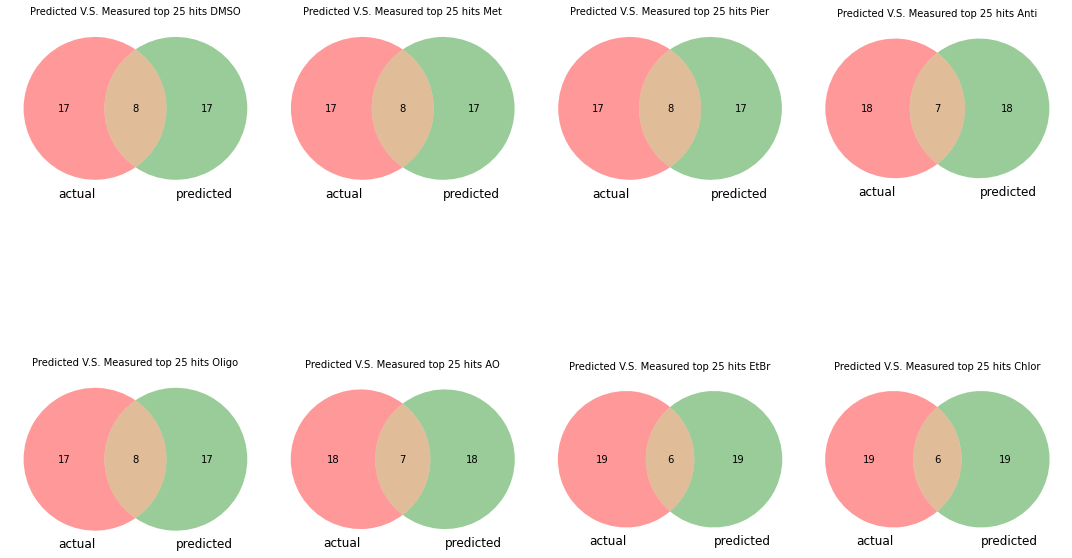

In [102]:
# Plot scatter plot
fig, axes = plt.subplots(2,4)
fig.set_size_inches(15, 12)
for i, ax in zip(range(8), axes.flat):
    
    drug = df_to_original.columns[i]
    
    top_actual = df_to['actual']['actual_'+drug].sort_values().head(25).index
    top_predicted = df_to['predicted']['predicted_'+drug].sort_values().head(25).index
    top_intersection = set(top_actual).intersection(top_predicted)
    other = [gene for gene in top_actual if gene not in top_intersection]
    venn_subset = (len(other),len(other),len(top_intersection))
    venn2(subsets = venn_subset, set_labels = ('actual', 'predicted'), ax = ax)
    ax.set_title('Predicted V.S. Measured top 25 hits '+drug, fontsize = 10)

plt.tight_layout()
pdf.savefig()

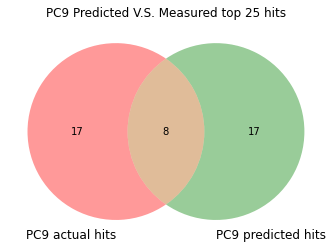

In [103]:
### PC9 Venndiagram
fig, ax = plt.subplots()

top_actual_pc9 = df_pc9['actual'].T.sort_values(by = 0).head(25).index
top_predicted_pc9 = df_pc9['predicted'].T.sort_values(by = 0).head(25).index
top_pc9_intersection = set(top_actual_pc9).intersection(top_predicted_pc9)
ex_actual_pc9 = [gene for gene in top_actual_pc9 if gene not in top_pc9_intersection]
ex_predicted_pc9 = [gene for gene in top_predicted_pc9 if gene not in top_pc9_intersection]
venn_subset = (len(ex_actual_pc9),  len(ex_predicted_pc9),len(top_pc9_intersection))
venn2(subsets = venn_subset, set_labels = ('PC9 actual hits', 'PC9 predicted hits'))
ax.set_title('PC9 Predicted V.S. Measured top 25 hits')
pdf.savefig()

In [104]:
pdf.close()